In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import xlrd

In [2]:
# Quand le format xlsx n'est pas supporté 
#pip install openpyxl
#changer le moteur d'ouverture du fichier excel avec engine='openpyxl'

In [3]:
df = pd.read_excel('base_atri_partie1.xlsx', engine = 'openpyxl')

In [4]:
df.head()

,ID_Part_anonymisé,CD_CLI_PROSP,CT_PART,AGE_ANC_PART,DT_NAIS_CREAT,departement,departement.1,DT_IN_REL,DF_REL,DD_PROSP,...,NB_ASS_VIE_RENTE,enfant_client,ID_PART3,CD_SS_STATU_MTF_CNTCT1,CD_STATU_MTF_CNTCT1,offre_25AN,ID_PART2,CD_SS_STATU_MTF_CNTCT,CD_STATU_MTF_CNTCT,offre_18AN
0,9901,P,PP,25,1995-09-22,Ardennes,GE,2005-01-06,2020-06-11,11Jun2020,...,0.0,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0
1,9902,P,PP,25,1995-09-22,Ardennes,GE,2005-01-06,2020-06-11,11Jun2020,...,0.0,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0
2,9903,C,PP,24,1996-06-29,Moselle,GE,1997-01-01,NaT,NaN,...,0.0,1,9903.0,TR,TR,1,NaN,NaN,NaN,0
3,9904,C,PP,25,1995-07-10,Meuse,GE,2007-08-10,NaT,NaN,...,0.0,1,NaN,NaN,NaN,0,NaN,NaN,NaN,0
4,9905,C,PP,25,1995-07-10,Meuse,GE,2007-08-10,NaT,NaN,...,0.0,1,9905.0,NaN,PE,1,NaN,NaN,NaN,0


In [5]:
df.shape

(37959, 109)

In [6]:
df.columns

Index(['ID_Part_anonymisé', 'CD_CLI_PROSP', 'CT_PART', 'AGE_ANC_PART',
       'DT_NAIS_CREAT', 'departement', 'departement.1', 'DT_IN_REL', 'DF_REL',
       'DD_PROSP',
       ...
       'NB_ASS_VIE_RENTE', 'enfant_client', 'ID_PART3',
       'CD_SS_STATU_MTF_CNTCT1', 'CD_STATU_MTF_CNTCT1', 'offre_25AN',
       'ID_PART2', 'CD_SS_STATU_MTF_CNTCT', 'CD_STATU_MTF_CNTCT',
       'offre_18AN'],
      dtype='object', length=109)

- #### Supprimer les varaibles qui ont servis à la construction de la base de données tels que Date d'entrée en relation, date de fin de relation,...

In [21]:
df1 = df[['ID_Part_anonymisé','AGE_ANC_PART','departement.1','Age','Attrition','SITU_FAM_AVAN',
         'CD_SEX','situ_pro','NB_CONTRAT_BAQ','NB_CONTRAT_Ass','NB_CONTRAT_eprgn','NB_CONTRAT_cred','NB_CONX_BAM_12M',
         'NB_CONX_BAM_1M','NB_CONX_BAM_3M','NB_CONX_INET_MOBL_12M','NB_CONX_INET_MOBL_1M','NB_CONX_INET_MOBL_3M',
         'NB_MSG_LU_BAM_SECU_12M','NB_OPERN_AG_1M','NB_OPERN_AG_3M','NB_OPERN_AG_12M','NB_OPERN_AG_FIN_1M',
         'NB_OPERN_AG_FIN_3M','NB_OPERN_AG_FIN_12M','NB_OPERN_AG_WEB_1M','NB_OPERN_AG_WEB_3M','NB_OPERN_AG_WEB_12M',
         'MT_1','MT_2','MT_3','MT_4','MT_5','MT_6','MT_7','MT_8','MT_9','MT_10','MT_11','MT_12','NB_DAV',
         'NB_OC_DEC_AUTOR','NB_CRDT_HABIT','NB_PEL_CAR_BLEU','NB_CEL_CAR_JAUNE','NB_PEL_CAR_VERT','NB_CODEBIS',
         'NB_CSL','NB_EPARGNE','NB_EP_HORS_BILAN','NB_DAT_CDN_BDC','NB_LDD','NB_LEP','NB_LIV_CEL','NB_LIV_A',
         'NB_LIV_JEUN_MOZAIC','NB_TIWI','NB_PEL_CAR_MAUVE','TOP_LIVRETS_JEUNE','NB_CAP_DEC_ABON','NB_ASS_VIE_HDG',
         'NB_ASS_VIE','NB_ESP_LIBERTE','NB_FLORIAGRI','NB_FLORIANE','NB_PEP_ASS','NB_PER_ASS','NB_PL_VERT_AVEN_ABON',
         'NB_PL_VERT_VITAL_ABON','NB_PREDIAGRI','NB_PREDIAGRI_ABON','NB_PREDIANCE','NB_PREDIANE','NB_ASS_VIE_ABON',
         'NB_PREDICIS','NB_PREDIGE','NB_CTO','NB_DAT','NB_PEA','NB_CTO_ABON','NB_PEA_ABO','NB_VERS_AVENIR','NB_PEL_CARRE',
         'NB_PL_VERT_VITAL','NB_PL_VERT_AVENIR','NB_PREDISSIME_9','NB_EP_BILAN','NB_EP_LIQUIDE','NB_EP_STABLE','NB_CSL_BOOST',
         'NB_ASS_VIE_RENTE','enfant_client','offre_25AN','offre_18AN']]

- #### Information sur le data set

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37959 entries, 0 to 37958
Data columns (total 94 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_Part_anonymisé       37959 non-null  int64  
 1   AGE_ANC_PART            37959 non-null  int64  
 2   departement.1           37959 non-null  object 
 3   Age                     37959 non-null  float64
 4   Attrition               37959 non-null  int64  
 5   SITU_FAM_AVAN           37959 non-null  int64  
 6   CD_SEX                  37959 non-null  object 
 7   situ_pro                37737 non-null  object 
 8   NB_CONTRAT_BAQ          36743 non-null  float64
 9   NB_CONTRAT_Ass          9811 non-null   float64
 10  NB_CONTRAT_eprgn        36463 non-null  float64
 11  NB_CONTRAT_cred         6050 non-null   float64
 12  NB_CONX_BAM_12M         35699 non-null  float64
 13  NB_CONX_BAM_1M          35699 non-null  float64
 14  NB_CONX_BAM_3M          35699 non-null

- #### Toutes les varibles sont numériques sauf 3 qi sont catégorielle : le département, le genre et la proffession 

In [23]:
# Voir si nous avons des données manquantes
df1.isna().sum()

ID_Part_anonymisé      0
AGE_ANC_PART           0
departement.1          0
Age                    0
Attrition              0
                    ... 
NB_CSL_BOOST         317
NB_ASS_VIE_RENTE     317
enfant_client          0
offre_25AN             0
offre_18AN             0
Length: 94, dtype: int64

- ### Remplacer les valeurs manquante par des zéro

In [24]:
#Remplacer les valeurs manquantes par 0
df1.fillna(0,inplace=True)

c:\python38\lib\site-packages\pandas\core\frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [25]:
#df1.isna().sum()

LabelEncoder takes this:

|Sex|
|------|
| Male |
|Female|

and converts it into:

| Male| Fem | 
|-----|-----|
| 1   | 0   |
| 0   | 1   |

LabelEncoder takes this:

|    Département     |
|--------------------|
|   GE(Grand Est)    |
| HGE(Hors Grand Est)|

and converts it into:

| GE  | HGE | 
|-----|-----|
| 1   | 0   |  
| 0   | 1   |  

In [26]:
# encoder le variable CD_SEX et departement et transformer la variable situ_pro en variable
df1['departement.1'].replace('GE',1,inplace=True)
df1['departement.1'].replace('HGE',0,inplace=True)
df1['CD_SEX'].replace('M',1,inplace=True)
df1['CD_SEX'].replace('F',0,inplace=True)

c:\python38\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


- #### Créer des Dummies avec la colonne profession

In [27]:
df1 = pd.concat([df1.drop('situ_pro', axis=1), pd.get_dummies(df1['situ_pro'], prefix='job')], axis=1)

In [28]:
df1.head()

,ID_Part_anonymisé,AGE_ANC_PART,departement.1,Age,Attrition,SITU_FAM_AVAN,CD_SEX,NB_CONTRAT_BAQ,NB_CONTRAT_Ass,NB_CONTRAT_eprgn,...,job_INSTITUT,job_OUVR.NON,job_OUVR.QUA,job_OUVRIER,job_PERS.SER,"job_PROF,PRO",job_PROF.ADM,job_PROF.INF,job_PROFESSI,job_SS ACT.-
0,9901,25,1,24.340426,1,1,0,10.0,0.0,2.0,...,0,0,0,0,0,0,0,0,0,0
1,9902,25,1,24.340426,1,1,0,10.0,0.0,2.0,...,0,0,0,0,0,0,0,0,0,0
2,9903,24,1,23.568977,0,1,1,1.0,0.0,2.0,...,0,0,0,0,0,0,0,0,0,0
3,9904,25,1,24.543583,0,1,1,8.0,0.0,2.0,...,0,0,0,0,0,0,0,0,0,0
4,9905,25,1,24.543583,0,1,1,8.0,0.0,2.0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
#colonne avec des valeurs nulles
df1 = df1.drop(['NB_CRDT_HABIT','NB_CODEBIS','NB_CONX_INET_MOBL_3M','NB_CRDT_HABIT','NB_CODEBIS','NB_TIWI',
'NB_ASS_VIE_HDG','NB_PEP_ASS','NB_PER_ASS','NB_PL_VERT_AVEN_ABON','NB_PREDIAGRI','NB_PREDIAGRI_ABON',
'NB_PREDIANCE','NB_PREDIGE','NB_PEA_ABO','NB_PL_VERT_AVENIR','NB_CSL_BOOST'], axis = 1)

In [60]:
df1.shape

(37959, 104)

In [65]:
#supprimer les les flux aprés 6 mois comme la table validation n'a que 6 mois sur les flux
df1 = df1.drop(['MT_7','MT_8','MT_9','MT_10','MT_11','MT_12'], axis = 1)

In [90]:
# Créer les colonne max, min, moyenne et médiane des flux
flux_max = []
flux_min = []
flux_mean = []
flux_med = []
for client in range(len(df1)):
        t = (df1['MT_1'][client], df1['MT_2'][client],df1['MT_3'][client],df1['MT_4'][client],df1['MT_5'][client], df1['MT_6'][client])
        flux_max.append(max(t))
        flux_min.append(min(t))      
        flux_mean.append(np.mean(t)) 
        flux_med.append(np.median(t))   

In [101]:
liste = pd.DataFrame([flux_max,flux_min,flux_mean,flux_med], index =['flux_max','flux_min','flux_mean','flux_med'])   
# table = pd.DataFrame(liste, columns = ['flux_max','flux_min','flux_mean','flux_med'], dtype = float)
# table
liste = liste.transpose()

In [104]:
liste.head()

,flux_max,flux_min,flux_mean,flux_med
0,21295.66,912.1,5070.973333,1471.435
1,2800.00,0.0,666.666667,125.000
2,70.00,10.0,20.000000,10.000
3,7110.00,30.0,1210.000000,30.000
4,1500.00,0.0,250.000000,0.000


In [116]:
colonne = np.concatenate((df1.columns,['flux_max','flux_min','flux_mean','flux_med']))
colonne

array(['ID_Part_anonymisé', 'AGE_ANC_PART', 'departement.1', 'Age',
       'Attrition', 'SITU_FAM_AVAN', 'CD_SEX', 'NB_CONTRAT_BAQ',
       'NB_CONTRAT_Ass', 'NB_CONTRAT_eprgn', 'NB_CONTRAT_cred',
       'NB_CONX_BAM_12M', 'NB_CONX_BAM_1M', 'NB_CONX_BAM_3M',
       'NB_CONX_INET_MOBL_12M', 'NB_CONX_INET_MOBL_1M',
       'NB_MSG_LU_BAM_SECU_12M', 'NB_OPERN_AG_1M', 'NB_OPERN_AG_3M',
       'NB_OPERN_AG_12M', 'NB_OPERN_AG_FIN_1M', 'NB_OPERN_AG_FIN_3M',
       'NB_OPERN_AG_FIN_12M', 'NB_OPERN_AG_WEB_1M', 'NB_OPERN_AG_WEB_3M',
       'NB_OPERN_AG_WEB_12M', 'MT_1', 'MT_2', 'MT_3', 'MT_4', 'MT_5',
       'MT_6', 'NB_DAV', 'NB_OC_DEC_AUTOR', 'NB_PEL_CAR_BLEU',
       'NB_CEL_CAR_JAUNE', 'NB_PEL_CAR_VERT', 'NB_CSL', 'NB_EPARGNE',
       'NB_EP_HORS_BILAN', 'NB_DAT_CDN_BDC', 'NB_LDD', 'NB_LEP',
       'NB_LIV_CEL', 'NB_LIV_A', 'NB_LIV_JEUN_MOZAIC', 'NB_PEL_CAR_MAUVE',
       'TOP_LIVRETS_JEUNE', 'NB_CAP_DEC_ABON', 'NB_ASS_VIE',
       'NB_ESP_LIBERTE', 'NB_FLORIAGRI', 'NB_FLORIANE',
       'NB_P

In [118]:
table = np.concatenate((df1,liste), axis = 1)
table1 = pd.DataFrame(table, columns = colonne)
table1.head()

,ID_Part_anonymisé,AGE_ANC_PART,departement.1,Age,Attrition,SITU_FAM_AVAN,CD_SEX,NB_CONTRAT_BAQ,NB_CONTRAT_Ass,NB_CONTRAT_eprgn,...,job_PERS.SER,"job_PROF,PRO",job_PROF.ADM,job_PROF.INF,job_PROFESSI,job_SS ACT.-,flux_max,flux_min,flux_mean,flux_med
0,9901.0,25.0,1.0,24.340426,1.0,1.0,0.0,10.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,21295.66,912.1,5070.973333,1471.435
1,9902.0,25.0,1.0,24.340426,1.0,1.0,0.0,10.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2800.00,0.0,666.666667,125.000
2,9903.0,24.0,1.0,23.568977,0.0,1.0,1.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,70.00,10.0,20.000000,10.000
3,9904.0,25.0,1.0,24.543583,0.0,1.0,1.0,8.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7110.00,30.0,1210.000000,30.000
4,9905.0,25.0,1.0,24.543583,0.0,1.0,1.0,8.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1500.00,0.0,250.000000,0.000


In [119]:
table1.isna().sum()

ID_Part_anonymisé    0
AGE_ANC_PART         0
departement.1        0
Age                  0
Attrition            0
                    ..
job_SS ACT.-         0
flux_max             0
flux_min             0
flux_mean            0
flux_med             0
Length: 102, dtype: int64

In [122]:
table1.shape

(37959, 102)

In [125]:
# Enregistrer la BDD néttoyé
table1.to_csv('BDD_nettoyé.csv',encoding='utf-8')

In [117]:
#pip install auto-sklearn

In [118]:
#Installer la librairie pour équiliber le data set
# pip install imbalanced-learn

In [160]:
# Utiliser AutoMl pour faire une classificatiin et chercher les varaibles importtantes
import sklearn.metrics
from sklearn.model_selection import train_test_split
import imblearn
from imblearn.over_sampling import SMOTE

In [161]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3,random_state=42)

In [162]:
print("Avant l'équilibrage, le compte des '1' : {}".format(sum(y_train==1)))
print("Avant l'équilibrage, le compte des '0' : {}".format(sum(y_train==0)))

Avant l'équilibrage, le compte des '1' : 1459
Avant l'équilibrage, le compte des '0' : 25112


In [163]:
#Equilibrer le data set
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [164]:
print("Après l'équilibrage, le compte des '1' : {}".format(sum(y_res==1)))
print("Après l'équilibrage, le compte des '0' : {}".format(sum(y_res==0)))

Après l'équilibrage, le compte des '1' : 25112
Après l'équilibrage, le compte des '0' : 25112


- Faire un modèle de classification: on commence par une regression logistique pour estimer la qualité de nos données le niveau de difficulté

In [199]:
# Regression logistique
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.linear_model import ElasticNet, SGDClassifier
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

LogisticRegression :


c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


L'évaluation du modèle est :                precision    recall  f1-score   support

           0       0.98      0.59      0.73     10731
           1       0.10      0.78      0.18       657

    accuracy                           0.60     11388
   macro avg       0.54      0.68      0.46     11388
weighted avg       0.93      0.60      0.70     11388

KNeighborsclissifier :
L'évaluation du modèle est :                precision    recall  f1-score   support

           0       0.97      0.83      0.90     10731
           1       0.17      0.56      0.26       657

    accuracy                           0.82     11388
   macro avg       0.57      0.70      0.58     11388
weighted avg       0.92      0.82      0.86     11388

DecisionTreeClassifier :
L'évaluation du modèle est :                precision    recall  f1-score   support

           0       0.98      0.86      0.91     10731
           1       0.23      0.71      0.35       657

    accuracy                           0.85 

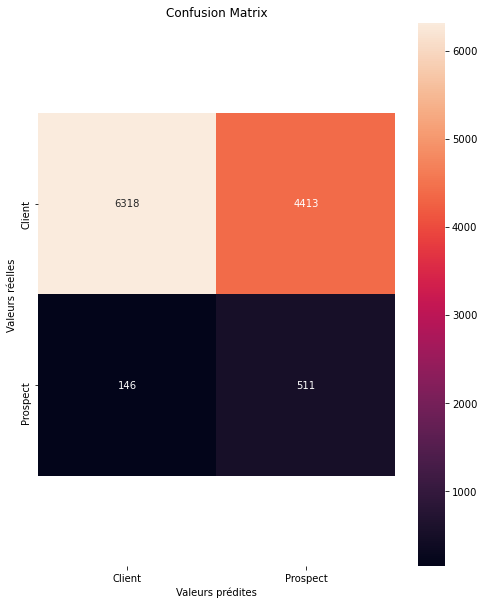

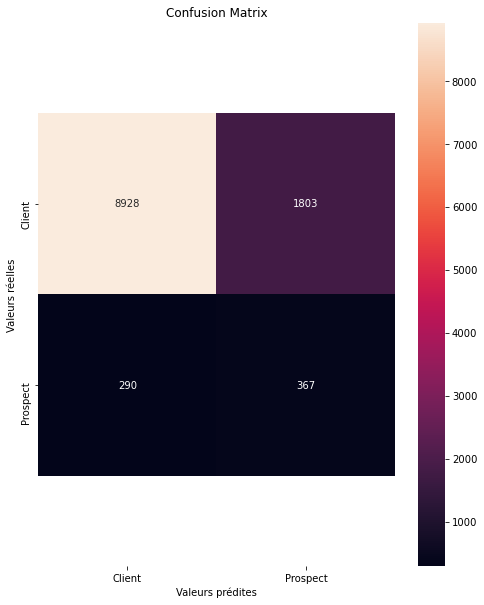

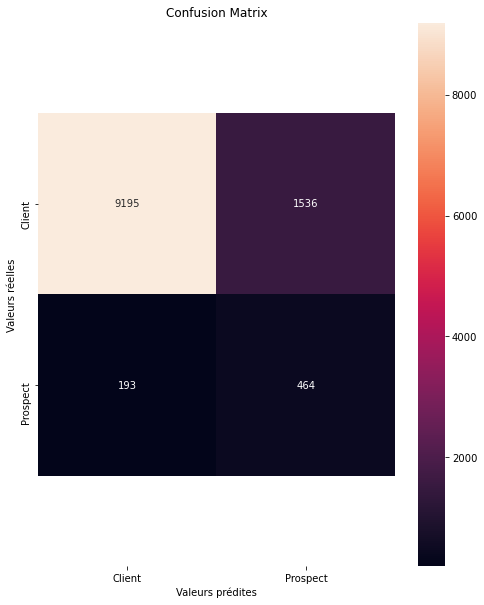

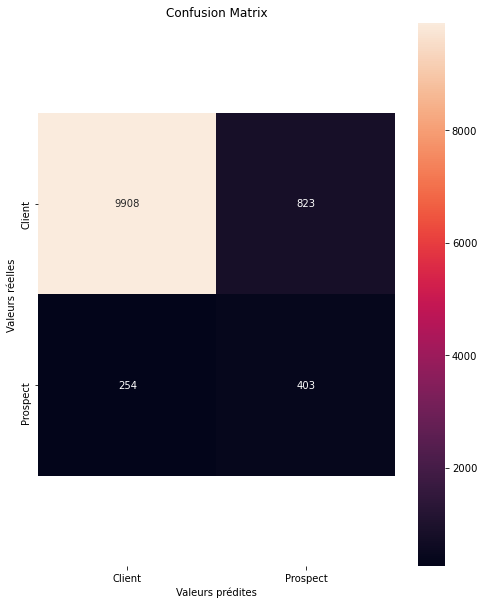

In [203]:
models = {'LogisticRegression':LogisticRegression(random_state=42),
         'KNeighborsclissifier':KNeighborsClassifier(),
         'DecisionTreeClassifier':DecisionTreeClassifier(max_depth=1,random_state=42),
         'XGBoost': GradientBoostingClassifier(n_estimators=500,learning_rate=1)
         }
#fonction de precision
def accu(y_test, y_pred, retu=False):
    report = classification_report(y_test, y_pred)
    if retu :
        return report
    else:
        print("L'évaluation du modèle est : ",report)
        
def Mat_confu(y_test,y_pred): 
    fig = plt.figure()
    # Matrice de confusion
    ax= plt.subplot()
    sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, ax = ax ,fmt='g'); #annot=True to annotate cells
    ax.set_xlabel('Valeurs prédites');ax.set_ylabel('Valeurs réelles'); 
    ax.set_title('Confusion Matrix'); 
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    ax.xaxis.set_ticklabels(['Client', 'Prospect']); ax.yaxis.set_ticklabels(['Client', 'Prospect']);
    print('='*70)
   
        
def train_test_eval(models, x_train,y_train,x_test,y_test):
    for name,model in models.items():
        print(name,':')
        model.fit(x_train,y_train)
        accu(y_test,model.predict(x_test))
        Mat_confu(y_test,model.predict(x_test))
        print('='*70)
        
train_test_eval(models,X_res,y_res,X_test,y_test)

In [ ]:
# Selectinner les varaibles importante


In [166]:
#avoir les variables importantes
reg = LassoCV()
reg.fit(X_res,y_res)

LassoCV()

In [167]:
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_res,y_res))
coef = pd.Series(reg.coef_, index = X_res.columns)

Best alpha using built-in LassoCV: 0.787811
Best score using built-in LassoCV: 0.087361


In [168]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 14 variables and eliminated the other 103 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

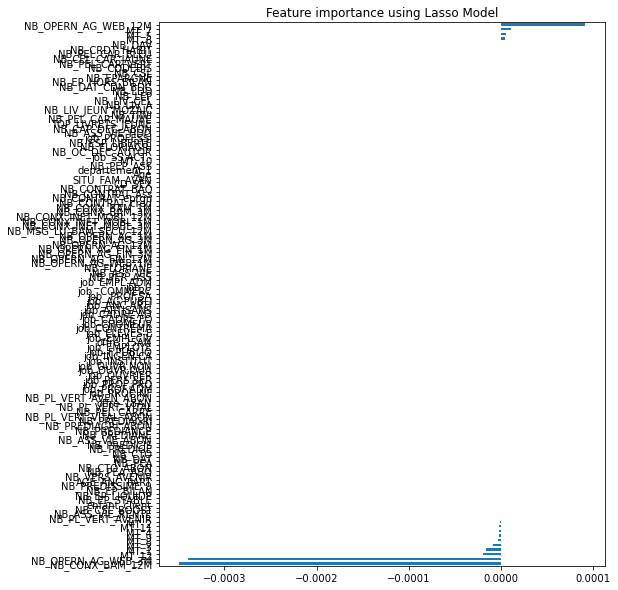

In [169]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [170]:
# affichage des variables importantes
features = pd.DataFrame(imp_coef.where(imp_coef != 0).dropna()).transpose().columns
print(features)
# creation de la nouvelle base de travail
y_ = pd.Index(['Attrition'])
features = features.append([y_])
print(features)

Index(['NB_CONX_BAM_12M', 'NB_OPERN_AG_WEB_3M', 'MT_12', 'MT_1', 'MT_3',
       'MT_8', 'MT_9', 'MT_4', 'MT_11', 'MT_2', 'MT_6', 'MT_5', 'MT_7',
       'NB_OPERN_AG_WEB_12M'],
      dtype='object')
Index(['NB_CONX_BAM_12M', 'NB_OPERN_AG_WEB_3M', 'MT_12', 'MT_1', 'MT_3',
       'MT_8', 'MT_9', 'MT_4', 'MT_11', 'MT_2', 'MT_6', 'MT_5', 'MT_7',
       'NB_OPERN_AG_WEB_12M', 'Attrition'],
      dtype='object')


In [171]:
data_ = df1[features]
data_.head(5)

,NB_CONX_BAM_12M,NB_OPERN_AG_WEB_3M,MT_12,MT_1,MT_3,MT_8,MT_9,MT_4,MT_11,MT_2,MT_6,MT_5,MT_7,NB_OPERN_AG_WEB_12M,Attrition
0,528.0,1152.0,1947.18,21295.66,1524.31,1026.16,2918.66,1418.56,7550.97,912.1,3867.97,1407.24,1115.84,3386.0,1
1,528.0,1152.0,300.00,2800.00,150.00,200.00,1000.00,100.00,800.00,0.0,0.00,950.00,0.00,3386.0,1
2,0.0,0.0,10.00,70.00,10.00,10.00,10.00,10.00,10.00,10.0,10.00,10.00,10.00,0.0,0
3,82.0,20.0,30.00,7110.00,30.00,5030.00,30.00,30.00,1930.00,30.0,30.00,30.00,30.00,242.0,0
4,82.0,20.0,0.00,1500.00,0.00,1500.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,242.0,0


In [66]:
data_.groupby('Attrition').count()

,NB_OPERN_AG_WEB_3M,NB_CONX_BAM_12M,MT_12,MT_1,MT_3,MT_11,MT_4,MT_2,MT_8,MT_9,MT_10,MT_6,MT_5,MT_7,NB_OPERN_AG_WEB_12M
Attrition,,,,,,,,,,,,,,,
0,35843,35843,35843,35843,35843,35843,35843,35843,35843,35843,35843,35843,35843,35843,35843
1,2116,2116,2116,2116,2116,2116,2116,2116,2116,2116,2116,2116,2116,2116,2116


In [67]:
# from sklearn.model_selection import train_test_split
X_ = data_.drop('Attrition', axis=1)
y_ = data_['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2, random_state=64)

In [68]:
# Entrainer le model
model = LogisticRegression(solver='lbfgs',multi_class='auto',penalty='none')
model.fit(X_train, y_train) #Training the model

#Test the model
y_pred = model.predict(X_test)
y_pred

c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [69]:
#Evaluer le modèle
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred)) # le plus important pour le moment; précisément la première ligne

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      7148
           1       0.10      0.00      0.01       444

    accuracy                           0.94      7592
   macro avg       0.52      0.50      0.49      7592
weighted avg       0.89      0.94      0.91      7592

0.9392781875658588
[[7129   19]
 [ 442    2]]


- On reamrque que le modèle n'est pas du tout permormant
- Solution 1 : pondération des modalités de la variable à expliquer
- Solution 2 : création d'un train plus équilibré

> ### Pondération des modalités

In [70]:
from sklearn.utils import class_weight
weight = class_weight.compute_class_weight('balanced', y_train.unique(), y_train)
model = LogisticRegression(multi_class='auto', solver='liblinear', class_weight = {0:weight[0], 1:weight[1]})

c:\python38\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[0 1], y=8833     0
26297    0
25000    0
4991     0
36323    0
        ..
13360    0
16469    0
36006    0
22647    0
21478    0
Name: Attrition, Length: 30367, dtype: int64 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [71]:
model.fit(X_train, y_train) #Training the model

#Test the model
y_pred = model.predict(X_test)
y_pred

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred)) # le plus important pour le moment; précisément la première ligne

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.50      0.66      7148
           1       0.09      0.81      0.17       444

    accuracy                           0.52      7592
   macro avg       0.53      0.66      0.41      7592
weighted avg       0.93      0.52      0.63      7592

0.5210748155953635
[[3595 3553]
 [  83  361]]


On a amélioré la prédiction des attrition mais pas satisfaisant encore

In [76]:
# Solution 2 : équilibrer les data set
# le but de la suite, c'est de donner à notre modèle, un train set plus équilibré
data_0 = df1.loc[data_['Attrition'] == 0]
X = data_0.drop('Attrition', axis=1)
y = data_0['Attrition']
X_train0, X_val, y_train0, y_val = train_test_split(X, y, test_size=0.95, random_state=64)

In [78]:
data_1 = df1.loc[data_['Attrition'] == 1]
X = data_1.drop('Attrition', axis=1)
y = data_1['Attrition']

X_ = pd.concat([X_train0, X], ignore_index=True)
# X_test = pd.concat([X_test0, X_test1], ignore_index=True)
y_ = pd.concat([y_train0, y], ignore_index=True)
# y_test = pd.concat([y_test0, y_test1], ignore_index=True)

X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.3, random_state=64)

In [83]:
X_train.head()

,ID_Part_anonymisé,AGE_ANC_PART,departement.1,Age,SITU_FAM_AVAN,CD_SEX,situ_pro,NB_CONTRAT_BAQ,NB_CONTRAT_Ass,NB_CONTRAT_eprgn,...,NB_PL_VERT_AVENIR,NB_PREDISSIME_9,NB_EP_BILAN,NB_EP_LIQUIDE,NB_EP_STABLE,NB_CSL_BOOST,NB_ASS_VIE_RENTE,enfant_client,offre_25AN,offre_18AN
3550,99032922,25,GE,24.200412,1,F,ELEVES-E,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,0,0
1581,99021845,24,GE,23.527797,1,M,"PROF,PRO",13.0,3.0,3.0,...,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0,0,0
2911,99023434,24,GE,23.374056,1,M,ELEVES-E,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0
1136,99024025,21,HGE,20.183940,1,M,ELEVES-E,3.0,0.0,3.0,...,0.0,0.0,3.0,2.0,1.0,0.0,0.0,1,1,0
678,9901527,24,GE,23.511325,1,M,ELEVES-E,10.0,0.0,4.0,...,0.0,0.0,4.0,3.0,1.0,0.0,0.0,1,1,0
